In [21]:
# Victor Z and Ugochukwu Ikegwu
# UW-Madison, 2024
# logistic classification for gibbs data

## Start here if working on google collab

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# Specify the path of this file (This may differ for each user)
path = '/content/drive/MyDrive/StatsBookCode/Python/'

In [24]:
# This is to check if the speficied path above is correct
!echo $path
import os
os.path.isdir(path)

/content/drive/MyDrive/StatsBookCode/Python/


True

In [25]:
# This is needed so we can import packages from a different path than standard libraries
import sys
sys.path.append(path)

## Start from here if working on local computer

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:
# Load data
filename = path+'Data/gibbs_hightemp_class.dat'
# read text file into pandas DataFrame
datahigh = pd.read_csv(filename, sep="\t", header=None)
datahigh.head(5)

,0,1,2
0,613.15,166.977686,0.536382
1,613.15,170.710337,0.546996
2,613.15,141.174815,0.455329
3,613.15,146.628653,0.473593
4,613.15,164.665427,0.529668


In [28]:
# Load data
filename = path+'Data/gibbs_lowtemp_class.dat'
# read text file into pandas DataFrame
datalow = pd.read_csv(filename, sep="\t", header=None)
datalow.head(5)

,0,1,2
0,583.15,166.977686,0.744386
1,583.15,170.710337,0.752465
2,583.15,141.174815,0.677784
3,583.15,146.628653,0.693596
4,583.15,164.665427,0.739204


In [29]:
# Concatenate both tables
data = pd.concat([datahigh, datalow])
datan = data.copy()
n = len(datan)

In [30]:
# Assign labels
for i in range(len(datan)):
    if datan.iloc[i, 0] == 583.15:
        datan.iloc[i, 0] = 1  # control normal
    else:
        datan.iloc[i, 0] = 0  # control failure


In [31]:
# Corrupt data with noise to hide pattern
np.random.seed(1) # to ensure reproducibility
x1 = datan.iloc[:, 1] + np.random.randn(n)*0.1 # Pressure
x2 = datan.iloc[:, 2] + np.random.randn(n)*0.1 # Conversion
y = datan.iloc[:, 0]
X = np.column_stack((x1, x2))

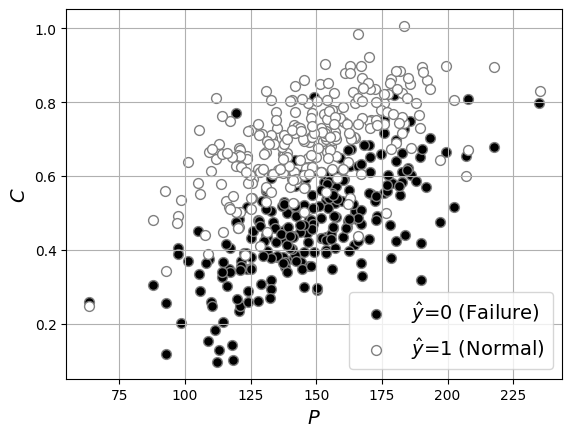

In [32]:
# Visualize the data
plt.figure(1)
plt.scatter(x1[y==0], x2[y==0], c='k', s=50, label='$\hat{y}$=0 (Failure)', edgecolors=(0.5, 0.5, 0.5))
plt.scatter(x1[y==1], x2[y==1], c='w', s=50, label='$\hat{y}$=1 (Normal)', edgecolors=(0.5, 0.5, 0.5))
plt.xlabel('$P$', fontsize=14)
plt.ylabel('$C$', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.show()


In [33]:

# Train model
np.random.seed(1)  # For reproducibility
Mdl = LogisticRegression()
Mdl.fit(X, y)


LogisticRegression()

In [34]:
# Predict
ypred = Mdl.predict(X)
Score = Mdl.predict_proba(X)
# Score indicates probability that the i-th prediction is in either class

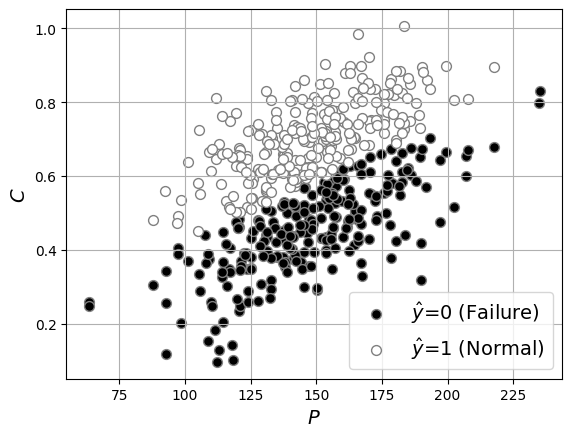

In [35]:
# Visualize the predictions
plt.figure(2)
plt.scatter(x1[ypred==0], x2[ypred==0], c='k', s=50, label='$\hat{y}$=0 (Failure)', edgecolors=(0.5, 0.5, 0.5))
plt.scatter(x1[ypred==1], x2[ypred==1], c='w', s=50, label='$\hat{y}$=1 (Normal)', edgecolors=(0.5, 0.5, 0.5))
plt.xlabel('$P$', fontsize=14)
plt.ylabel('$C$', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.grid(True)
plt.show()


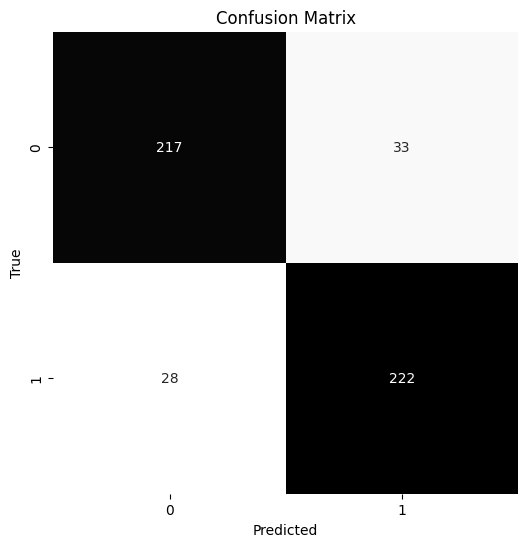

In [36]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y, ypred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


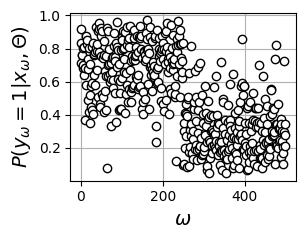

In [37]:
# Show probabilities
plt.subplot(2, 2, 2)
plt.plot(Score[:, 0], 'ko', markerfacecolor='w')
plt.xlabel('$\omega$', fontsize=14)
plt.ylabel('$P(y_\omega=1|x_\omega,\Theta)$', fontsize=14)
plt.grid(True)
plt.show()


In [38]:
# Splitting data set into train and test
Ystats = y
X_train, X_test, y_train, y_test = train_test_split(X, Ystats, test_size=0.4, random_state=42)

# Training logistic regression model
Mdl = LogisticRegression()
Mdl.fit(X_train, y_train)

# Predictions on train and test sets
labelTrain = Mdl.predict(X_train)
labelTest = Mdl.predict(X_test)


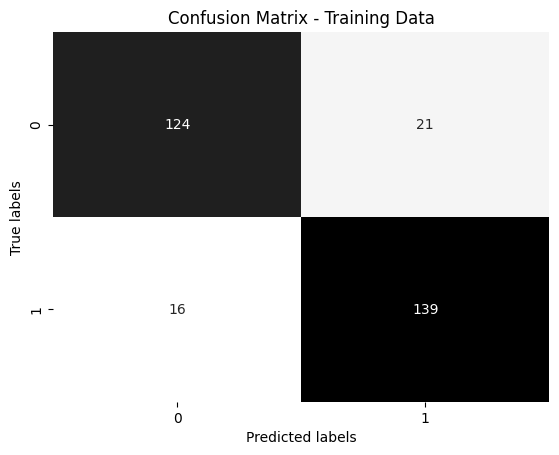

In [39]:
# Construct a confusion matrix for the training data
plt.figure(5)
ConfusionTrain = confusion_matrix(y_train, labelTrain)
sns.heatmap(ConfusionTrain, annot=True, fmt="d", cmap="binary", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Data')
plt.show()


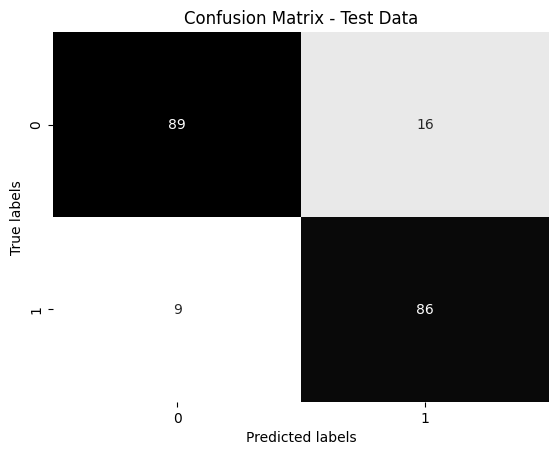

In [40]:
# Construct a confusion matrix for the test data
plt.figure(6)
ConfusionTest = confusion_matrix(y_test, labelTest)
sns.heatmap(ConfusionTest, annot=True, fmt="d", cmap="binary", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()